
Variables and Definitions

LEAID
     Unique district identifier 


NAME
     District name 


CITY
     City where district office is located 


STATE
     State where district office is located 


MEMBER_alt
     Number of students in alternative schools 


revised
     Alternative school enrollment has been adjusted to reflect additional reporting by ProPublica (TRUE/FALSE) 


hasReassignedSchools
     District includes schools (regardless of alternative status) that were reassigned geographically into the district (TRUE/FALSE) 


altRatio_99
     Per capita alternative school enrollment in 1999 (For a small number of districts that opened after 1999, measure is for the earliest available year. Denominator is the non-elementary enrollment of the district.) 


altRatio
     Per capita alternative school enrollment (Denominator is the non-elementary population of the district.) 


altRatio_growth
     Percentage point growth in alternative school enrollment, 1999-2000 to 2013-14 


p

NameError: name 'xs' is not defined

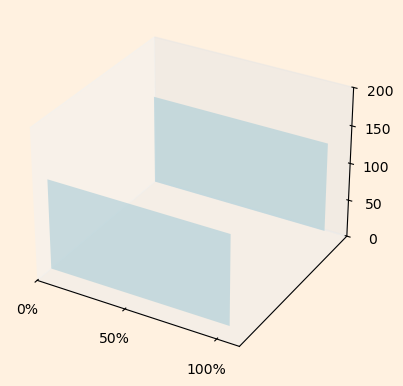

In [1]:
import matplotlib.pyplot as plt  # Import the Matplotlib library for plotting | Importa la librería Matplotlib para graficar
from matplotlib.collections import PolyCollection  # Import PolyCollection for handling multiple polygons | Importa PolyCollection para manejar múltiples polígonos
import pandas as pd  # Import pandas for data manipulation | Importa pandas para manipulación de datos
import numpy as np  # Import NumPy for numerical operations | Importa NumPy para operaciones numéricas


############################################################
#  File 1: Read data, make dataframe, and explore data
#  Archivo 1: Leer datos, crear dataframe y explorar datos
############################################################

# .csv file has a header. | El archivo .csv tiene un encabezado.
# index_col default is None. | index_col por defecto es None.
df1 = pd.read_csv("data/codebook_district.2017.03.15.csv")  # Read the CSV file into a DataFrame | Lee el archivo CSV en un DataFrame

print("\nVariables and Definitions\n")  # Print header | Imprime el encabezado
num_rows = df1.shape[0]  # Get number of rows | Obtiene el número de filas
for i in range(num_rows):  # Iterate over rows | Itera sobre las filas
    row = df1.iloc[[i]]   # Get row i | Obtiene la fila i
    v = row['variable'].values[0]  # Extract variable name | Extrae el nombre de la variable
    d = row['definition'].values[0]  # Extract definition | Extrae la definición
    print(v)  # Print variable | Imprime la variable
    print("    ", d, "\n\n")  # Print definition with spacing | Imprime la definición con espacio


############################################################
#  File 2: Read data, make dataframe, and explore data
#  Archivo 2: Leer datos, crear dataframe y explorar datos
############################################################

df = pd.read_csv("data/district.2017.03.15.csv")  # Read data into a DataFrame | Lee los datos en un DataFrame
print(df.head(2), '\n')  # Print first 2 rows | Imprime las primeras 2 filas

print(df.columns, '\n')  # Print column names | Imprime los nombres de las columnas

print(df.info(), '\n')  # Print DataFrame info | Imprime información del DataFrame


############################################################
#  Prep scatterplot data 
#  Preparar datos para el diagrama de dispersión
############################################################

# IN: col1, col2: dataframe column names | Nombres de columnas del DataFrame
# IN: y_value: fixed y-coordinate | Coordenada y fija
# IN: max_col1, max_col2: used to filter out rows with too high values | Filtros para eliminar valores altos
# OUT: xs, ys, zs:  3 lists representing, | 3 listas representando
#      all the x-coordinates, y-coordinates, and z-coordinates | todas las coordenadas x, y, y z
def compare_2_columns( col1, y_value, col2, max_col1, max_col2):  # Function to compare two columns | Función para comparar dos columnas
    print(f"\n\nComparing columns {col1} and {col2}")  # Print comparison message | Mensaje de comparación

    #only keep columns 'col1' and 'col2' | Mantener solo las columnas 'col1' y 'col2'
    df2 = df[[col1, col2]].copy()
    print(df2.head(), '\n')  # Print first rows | Imprime las primeras filas
    print(df2.info(), '\n')  # Print DataFrame info | Información del DataFrame
    print(df2.describe(), '\n')  # Print statistics | Estadísticas

    print(f"df2 shape: {df2.shape}\n")  # Print DataFrame shape | Imprime la forma del DataFrame
    df2.dropna(inplace=True)  # Drop rows with missing data | Elimina filas con datos faltantes
    print("After dropping empty rows")  # Print message | Mensaje
    print(f"df2 shape: {df2.shape}\n")  # Print new shape | Imprime la nueva forma

    print("Drop rows that have faulty data")  # Drop invalid rows | Elimina filas con datos incorrectos

    if max_col1:  # If max_col1 is set | Si max_col1 está definido
        df2 = df2[df2[col1] <= max_col1]  # Filter out high values | Filtra valores altos
        print("\nmax_col1: After dropping rows with bad data")  # Message | Mensaje
        print(f"df2 shape: {df2.shape}\n")  # Print new shape | Nueva forma

    if max_col2:  # If max_col2 is set | Si max_col2 está definido
        toss = list(df2[df2[col2] > max_col2][col2])  # Identify outliers | Identifica valores atípicos
        print(f"Throwing out {len(toss)} values:")  # Print count | Cuenta
        print(toss)  # Print values | Imprime valores

        df2 = df2[df2[col2] <= max_col2]  # Filter values | Filtra valores
        print("\nmax_col2: After dropping rows with bad data")  # Message | Mensaje
        print(f"df2 shape: {df2.shape}\n")  # New shape | Nueva forma

    xs = list(df2[col1])  # X values | Valores X
    ys = np.zeros(len(xs)) + y_value  # Fixed Y values | Valores Y fijos
    zs = list(df2[col2])  # Z values | Valores Z  
    return xs, ys, zs  # Return lists | Retorna listas


############################################################
#  Colors 
#  Colores
############################################################

OldLace = '#FFF1E0'  # Define color | Define color
FrostedGlass = '#a8ccd7'  # Define color | Define color
Glass = '#f6feff'  # Define color | Define color


############################################################
#  Plot Figure
#  Graficar figura
############################################################

fig = plt.figure(facecolor=OldLace)  # Create figure with background color | Crea figura con color de fondo
ax = fig.add_subplot(111, projection='3d', computed_zorder=False)  # 3D subplot | Subplot en 3D
ax.set_facecolor(OldLace)  # Set axis background color | Color de fondo del eje

fig.subplots_adjust(bottom=0.1, top=0.85)  # Adjust subplot spacing | Ajusta espacio entre subplots


############################################################
#  2 Backdrop Planes
#  2 Planos de fondo
############################################################

rects = [[(0, 0), (0, 120), (100, 120), (100, 0)]] * 2  # Define rectangles | Define rectángulos
poly = PolyCollection(rects, facecolors=[FrostedGlass, FrostedGlass], alpha=0.6, zorder=0.1)  # Create semi-transparent planes | Crea planos semitransparentes
ax.add_collection3d(poly, zs=[0.11, 0.99], zdir='y')  # Add planes to plot | Agrega planos al gráfico


############################################################
#  Grid, Axis, Ticks, Labels
#  Cuadrícula, Ejes, Ticks, Etiquetas
############################################################

ax.set(xlim=(0, 112), ylim=(0, 1), zlim=(0, 200))  # Set axis limits | Establece límites de los ejes
ax.grid(False)  # Disable grid | Desactiva la cuadrícula

ax.set_xticks(range(0, 112, 50), labels=["0%", "50%", "100%"])  # Set X ticks | Define marcas en X
ax.set_yticks([])  # Remove Y ticks | Elimina marcas en Y
ax.set_zticks(range(0, 201, 50), labels=["0", "50", "100", "150", "200"])  # Set Z ticks | Define marcas en Z


############################################################
#  Scatter Plots
#  Diagramas de dispersión
############################################################

ax.scatter(xs, ys, zs, color='blue', alpha=0.3, zorder=2.5)  # Plot blue points | Puntos azules
ax.scatter(xs2, ys2, zs2, color='red', alpha=0.3, zorder=2.5)  # Plot red points | Puntos rojos

plt.savefig('education.png')  # Save figure | Guarda la figura
